In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import matplotlib.patches as patches
import tifffile
from tifffile import imread

In [4]:
def interpolate_nan_values(data):
    n_rows, n_cols = data.shape
    for i in range(n_rows):
        mask = np.isnan(data[i])
        indices = np.arange(n_cols)
        data[i][mask] = np.interp(indices[mask], indices[~mask], data[i][~mask])
    return data

In [6]:
ls

NeuronRecruitmentMaps.ipynb  time_maps/
TimeRecruiment.ipynb


In [8]:
cd ..

/Users/greco/Desktop


After run code was developed to find neurons reliably recruited following optogenetic stimulation of noradenergic neurons. This code is quite repetitve, but this is done to have full control onto every single experiment. 



# Plane 1 

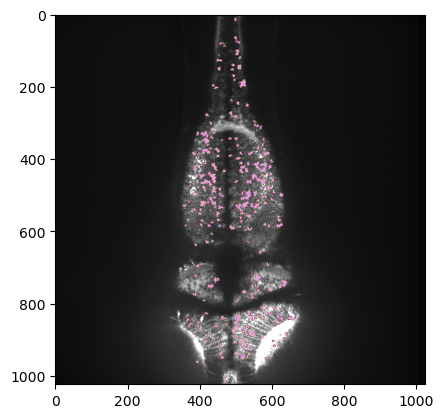

In [17]:
#Load data from suite2p
spks   =   np.load('excitation/F1/rec_opsin/3trials_p1/suite2p/plane0/spks.npy', allow_pickle=True)   
F      =   np.load('excitation/F1/rec_opsin/3trials_p1/suite2p/plane0/F.npy', allow_pickle=True)
F_neu  =   np.load('excitation/F1/rec_opsin/3trials_p1/suite2p/plane0/Fneu.npy', allow_pickle=True)
iscell =   np.load('excitation/F1/rec_opsin/3trials_p1/suite2p/plane0/iscell.npy', allow_pickle=True)
stat   =   np.load('excitation/F1/rec_opsin/3trials_p1/suite2p/plane0/stat.npy', allow_pickle=True)
ops   =   np.load('excitation/F1/rec_opsin/3trials_p1/suite2p/plane0/ops.npy', allow_pickle=True).item()

video = imread('excitation/F1/rec_opsin/3trials_p1/F1_3s_p1_t1_rec.tif')

#Get mask of all neurons found
x = []
y = []
    
binCell = (iscell[:,0] == 1)
im = np.zeros((ops['Ly'], ops['Lx']))

for n in range(0,len(spks)):
        
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    x.append(xpix)
    y.append(ypix)
        
    if(binCell[n]):
        
        im[ypix,xpix] = 1

#Plot the mask
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = 80)
plt.imshow(im, alpha = (im>0).astype(float), cmap = 'tab20b')
plt.show()

#Compute df/f  

Fluor_t1 = F[:, 0:360] - 0.7*F_neu[:, 0:360]
Fluor_t2 = F[:, 360:720] - 0.7*F_neu[:, 360:720]
Fluor_t3 = F[:, 720:] - 0.7*F_neu[:, 720:]

    
Dff_trial_1 = np.zeros(np.shape(Fluor_t1))
Dff_trial_2 = np.zeros(np.shape(Fluor_t2))
Dff_trial_3 = np.zeros(np.shape(Fluor_t3))

baseline_idxs = (spks == 0)
baseline_1 = baseline_idxs[:, 0:360]
baseline_2 = baseline_idxs[:, 360:720]
baseline_3 = baseline_idxs[:, 720:]

#We take as baseline 20s pre stim and compute df/f

#baseline_1[:, 0:50]  = False
baseline_1[:, 150:] = False
   
for k in range(0, len(baseline_1)):
    mean_fluor = np.median(Fluor_t1[:, baseline_1[k,:]]) 
    #if(np.isnan(mean_fluor)):
    #    binCell[k] = False
        
    Dff_trial_1[k,:] = (Fluor_t1[k,:] - mean_fluor)/mean_fluor

Dff_trial_1[:, 162:179] = 'Nan'

baseline_2[:, 0:50]  = False
#baseline_2[:, 150:] = False

for k in range(0, len(baseline_2)):
    mean_fluor = np.median(Fluor_t2[:, baseline_2[k,:]])   
    #if(np.isnan(mean_fluor)):
    #    binCell[k] = False
    
    Dff_trial_2[k,:] = (Fluor_t2[k,:] - mean_fluor)/mean_fluor


Dff_trial_2[:, 1:5] = 'Nan'
Dff_trial_2[:, 24:40] = 'Nan'
Dff_trial_2[:, 163:167] = 'Nan'
Dff_trial_2[:, 271:274] = 'Nan'


baseline_3[:, 0:50]  = False
#baseline_3[:, 150:] = False

for k in range(0, len(baseline_3)):
    
    mean_fluor = np.median(Fluor_t3[:, baseline_3[k,:]])   
    
    #if(np.isnan(mean_fluor)):
    #    binCell[k] = False

    Dff_trial_3[k,:] = (Fluor_t3[k,:] - mean_fluor)/mean_fluor


Dff_trial_3[:, 1:9] = 'Nan'
Dff_trial_3[:, 87:101] = 'Nan'
Dff_trial_3[:, 164:183] = 'Nan'

Dff_trial_1 = Dff_trial_1[binCell, :]
Dff_trial_2 = Dff_trial_2[binCell, :]
Dff_trial_3 = Dff_trial_3[binCell, :]


#Get the position of the neurons
P = []

for n in range(0,len(spks)):
        
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    x.append(xpix)
    y.append(ypix)
        
    if(binCell[n]):
        P.append([xpix, ypix])

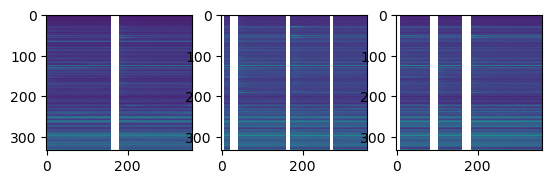

In [18]:
#Plot the traces
plt.subplot(131)
plt.imshow(Dff_trial_1)

plt.subplot(132)
plt.imshow(Dff_trial_2)

plt.subplot(133)
plt.imshow(Dff_trial_3)


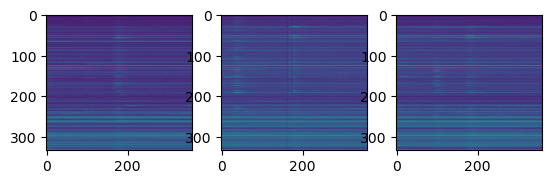

In [19]:
#Interpolate Nan values

Dff_trial_1 = interpolate_nan_values(Dff_trial_1)
Dff_trial_2 = interpolate_nan_values(Dff_trial_2)
Dff_trial_3 = interpolate_nan_values(Dff_trial_3)

plt.subplot(131)
plt.imshow(Dff_trial_1)

plt.subplot(132)
plt.imshow(Dff_trial_2)

plt.subplot(133)
plt.imshow(Dff_trial_3)

plt.show()

In [20]:
# Final stim frames, manually annotated
D = [Dff_trial_1, Dff_trial_2, Dff_trial_3]
end_stims = [175, 175, 177]

Activated:  [ 30  31  36  40  52  56  58  59  62  68  75  85  87  92  93  94 105 108
 110 112 115 118 120 124 135 140 144 154 163 167 170 175 176 178 181 184
 189 192 228 231 245 251 252 274 313]


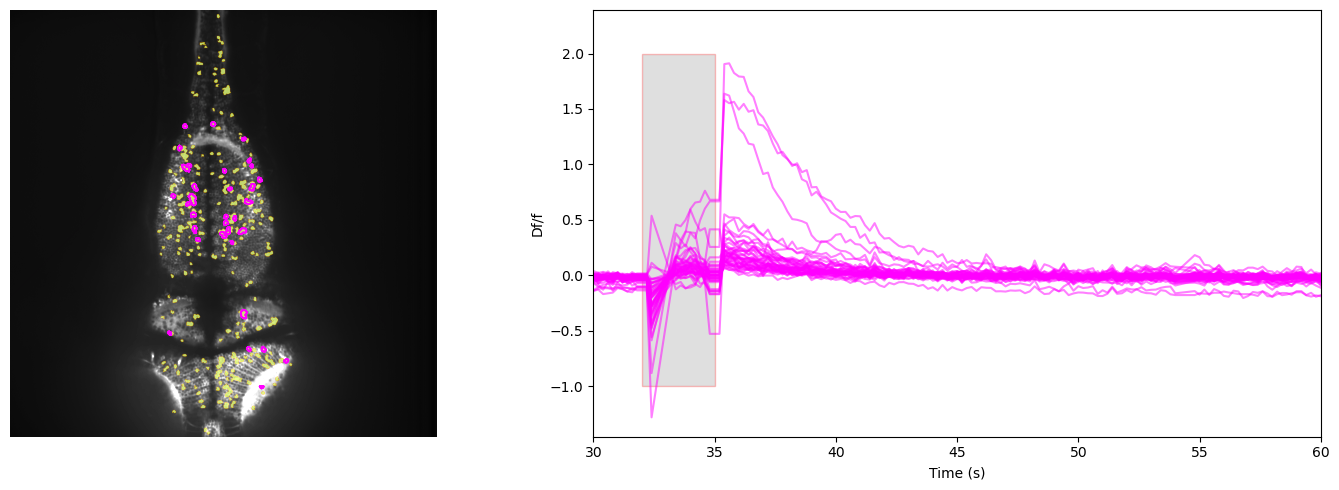

In [21]:
#Make recruitment maps

Active_mask_tot = np.ones((ops['Ly'], ops['Lx']))       #Overall recruitment mask over the 3 trials
Active_Neurons = []                                     #Save the indeces of the recruited neurons in each run


SCORES = []

bases = [baseline_1, baseline_2, baseline_3]

for k in range(0, 3):

    end_stim = end_stims[k]

    Dff = D[k]

    activated_neurons = []
    inhibited_neurons = []

    active_mask_binary = np.zeros((ops['Ly'], ops['Lx']))
    inhibited_mask_binary = np.zeros((ops['Ly'], ops['Lx']))

    score = []
    bs = bases[k]

    
    for i in range(0, len(Dff)):

        #Compute std 5 seconds before stimulus
        std_trace = np.nanstd(Dff[i, end_stim - 15 - 50:end_stim-15]) 

        #Get coordinates of the current neuron
        ypix = P[i][1] 
        xpix = P[i][0] 

        #Check if DF/F in the 1st sec post stim is above 3 std
        diff = np.nanmean(Dff[i, end_stim:end_stim+5]) - np.nanmean(Dff[i, end_stim-15-5:end_stim-15])
        
        if( np.abs(diff)  >  3 * std_trace ):

            activated_neurons.append(i)
            score.append(np.abs(diff)/std_trace)
            active_mask_binary[ypix,xpix] = 1
        


    #Update mask and indeces array
    Active_mask_tot = Active_mask_tot*active_mask_binary
    Active_Neurons.append(activated_neurons)

    SCORES.append(score)


final_act_neu = np.intersect1d(Active_Neurons[0], Active_Neurons[1])
final_act_neu = np.intersect1d(final_act_neu, Active_Neurons[2])
print("Activated: ", final_act_neu)

#final_scores = SCORES[0][final_act_neu] + SCORES[1][final_act_neu] + SCORES[2][final_act_neu] 
#final_scores = final_scores/3

time = np.linspace(0, 360, 361)
time = time[:-1]*0.2

plt.figure(figsize = (15, 5))

plt.subplot(121)
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)
plt.contour(Active_mask_tot, colors='magenta', linewidths=1)
#plt.contour(Inhibited_mask_tot, colors='cyan', linewidths=1)

plt.axis('off')

plt.subplot(122)

for i in range(0, len(final_act_neu)):
    plt.plot(time, Dff_trial_2[final_act_neu[i], :] - np.mean(Dff_trial_2[final_act_neu[i], baseline_2[i]]), alpha = 0.5, color = 'magenta')


#for i in range(0, len(Dff_trial_2)//4):
#    plt.plot(time, Dff_trial_2[inactive[i], :] - np.mean(Dff_trial_2[inactive[i], :]), alpha = 0.5, color = 'yellow')

plt.xlim(30, 60)

plt.xlabel("Time (s)")
plt.ylabel("Df/f")
plt.gca().add_patch(patches.Rectangle((160*0.2, -1), 3., 3, facecolor='gray', edgecolor='red', alpha = 0.25))

plt.tight_layout()

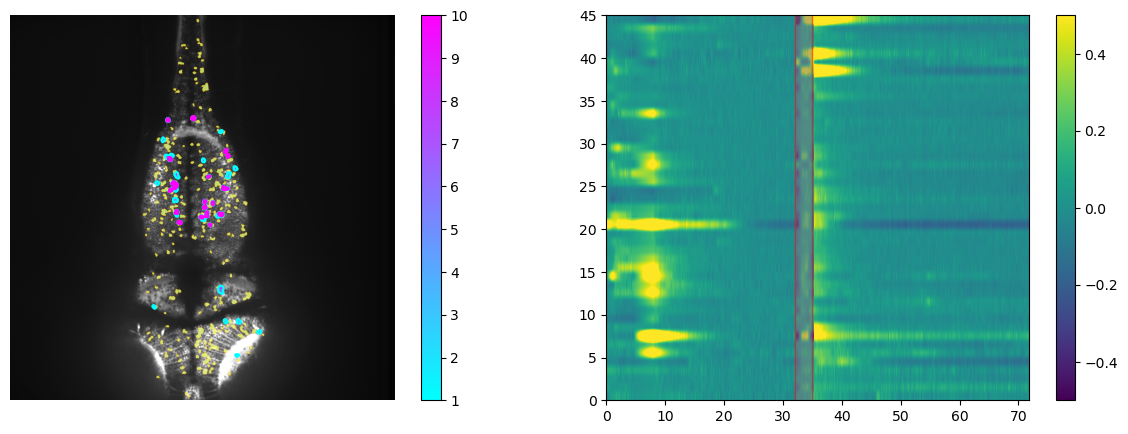

In [22]:
# Plot recruited neurons and their activity
plt.figure(figsize = (15, 5))

Mask = np.zeros((ops['Ly'], ops['Lx']))
S = np.zeros(len(final_act_neu))

for l in range(0, 3):
    Dff = D[l]
    
    for k, i in enumerate(final_act_neu):
    
        ypix = P[i][1] 
        xpix = P[i][0] 

        diff = np.nanmean(Dff[i, end_stim:end_stim+5]) - np.nanmean(Dff[i, end_stim-15-5:end_stim-15])
        std_trace = np.nanstd(Dff[i, end_stim - 15 - 50:end_stim-15]) 

        score = diff/std_trace
        
        Mask[ypix, xpix] = Mask[ypix, xpix] + score/3
        S[k] = S[k] + score/3
        


plt.subplot(121)
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'cool', alpha = (Mask > 0).astype(float), vmin = 1, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'cool', vmin = 1, vmax = 10)

plt.axis('off')

plt.subplot(122)

data = np.zeros(np.shape(Dff_trial_2[final_act_neu, :]))

for i in range(0, len(final_act_neu)):
    data[i] = Dff_trial_2[final_act_neu[i], :] - np.mean(Dff_trial_2[final_act_neu[i], 100:150])
    
plt.imshow(data, aspect = 'auto', extent = [0, np.max(time), 0, len(final_act_neu)], vmax = 0.5, vmin = -0.5)
plt.gca().add_patch(patches.Rectangle((160*0.2, -1), 3., 180, facecolor='gray', edgecolor='red', alpha = 0.5))
plt.colorbar()

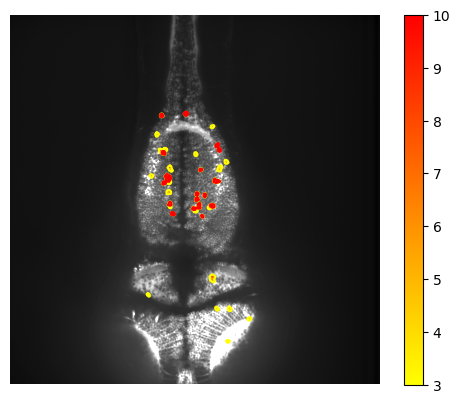

In [31]:
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3.5)
#plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'autumn_r', alpha = (Mask > 0).astype(float), vmin = 3, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'autumn_r', vmin = 3, vmax = 10)

plt.axis('off')

plt.savefig("P1_opsin.svg")

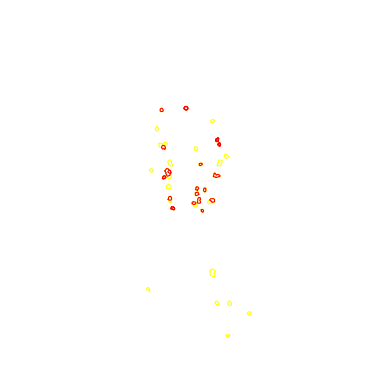

In [88]:
#plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/2)
#plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'autumn_r', alpha = 0, vmin = 3, vmax = 10)
#plt.colorbar()

plt.contour(Mask, cmap = 'autumn_r', vmin = 3, vmax = 10, linewidths = 0.75)

plt.axis('off')

#np.save("p1_out.npy", Mask)
plt.savefig("P1_out_opsin.svg")

## Plane 2

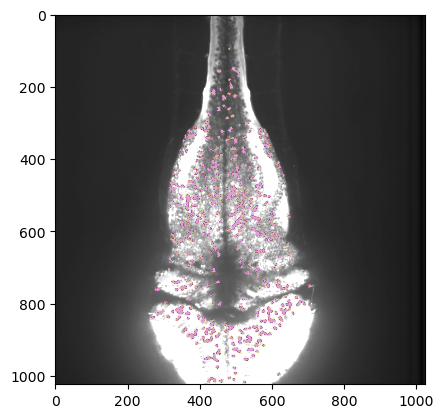

In [29]:
#Load data from suite2p
spks   =   np.load('excitation/F1/rec_opsin/3trials_p2/suite2p/plane0/spks.npy', allow_pickle=True)   
F      =   np.load('excitation/F1/rec_opsin/3trials_p2/suite2p/plane0/F.npy', allow_pickle=True)
F_neu  =   np.load('excitation/F1/rec_opsin/3trials_p2/suite2p/plane0/Fneu.npy', allow_pickle=True)
iscell =   np.load('excitation/F1/rec_opsin/3trials_p2/suite2p/plane0/iscell.npy', allow_pickle=True)
stat   =   np.load('excitation/F1/rec_opsin/3trials_p2/suite2p/plane0/stat.npy', allow_pickle=True)
ops   =   np.load('excitation/F1/rec_opsin/3trials_p2/suite2p/plane0/ops.npy', allow_pickle=True).item()

video = imread('excitation/F1/rec_opsin/3trials_p2/F1_3s_p2_t1_rec copy.tif')

#Get mask of all neurons found
x = []
y = []
    
binCell = (iscell[:,0] == 1)
im = np.zeros((ops['Ly'], ops['Lx']))

for n in range(0,len(spks)):
        
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    x.append(xpix)
    y.append(ypix)
        
    if(binCell[n]):
        
        im[ypix,xpix] = 1

#Plot the mask
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = 80)
plt.imshow(im, alpha = (im>0).astype(float), cmap = 'tab20b')
plt.show()

#Compute df/f  

Fluor_t1 = F[:, 0:360] - 0.7*F_neu[:, 0:360]
Fluor_t2 = F[:, 360:720] - 0.7*F_neu[:, 360:720]
Fluor_t3 = F[:, 720:] - 0.7*F_neu[:, 720:]

    
Dff_trial_1 = np.zeros(np.shape(Fluor_t1))
Dff_trial_2 = np.zeros(np.shape(Fluor_t2))
Dff_trial_3 = np.zeros(np.shape(Fluor_t3))

baseline_idxs = (spks == 0)
baseline_1 = baseline_idxs[:, 0:360]
baseline_2 = baseline_idxs[:, 360:720]
baseline_3 = baseline_idxs[:, 720:]

#We take as baseline 20s pre stim and compute df/f

baseline_1[:, 0:50]  = False
baseline_1[:, 150:] = False
   
for k in range(0, len(baseline_1)):
    mean_fluor = np.median(Fluor_t1[:, baseline_1[k,:]]) 
    if(np.isnan(mean_fluor)):
        binCell[k] = False
        
    Dff_trial_1[k,:] = (Fluor_t1[k,:] - mean_fluor)/mean_fluor

Dff_trial_1[:, 165:186] = 'Nan'

baseline_2[:, 0:50]  = False
baseline_2[:, 150:] = False

for k in range(0, len(baseline_2)):
    mean_fluor = np.median(Fluor_t2[:, baseline_2[k,:]])   
    if(np.isnan(mean_fluor)):
        binCell[k] = False
    
    Dff_trial_2[k,:] = (Fluor_t2[k,:] - mean_fluor)/mean_fluor

Dff_trial_2[:, 55:69] = 'Nan'
Dff_trial_2[:, 169:175] = 'Nan'
Dff_trial_2[:, 180:186] = 'Nan'


baseline_3[:, 0:50]  = False
baseline_3[:, 150:] = False

for k in range(0, len(baseline_3)):
    
    mean_fluor = np.median(Fluor_t3[:, baseline_3[k,:]])   
    
    if(np.isnan(mean_fluor)):
        binCell[k] = False

    Dff_trial_3[k,:] = (Fluor_t3[k,:] - mean_fluor)/mean_fluor

Dff_trial_3[:, 68:89] = 'Nan'
Dff_trial_3[:, 162:170] = 'Nan'
Dff_trial_3[:, 207:209] = 'Nan'
Dff_trial_3[:, 218:222] = 'Nan'

Dff_trial_1 = Dff_trial_1[binCell, :]
Dff_trial_2 = Dff_trial_2[binCell, :]
Dff_trial_3 = Dff_trial_3[binCell, :]


#Get the position of the neurons
P = []

for n in range(0,len(spks)):
        
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    x.append(xpix)
    y.append(ypix)
        
    if(binCell[n]):
        P.append([xpix, ypix])

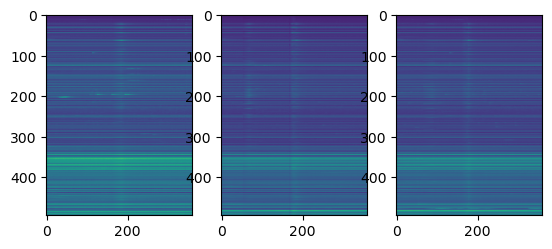

In [31]:
#Interpolate Nan values

Dff_trial_1 = interpolate_nan_values(Dff_trial_1)
Dff_trial_2 = interpolate_nan_values(Dff_trial_2)
Dff_trial_3 = interpolate_nan_values(Dff_trial_3)

plt.subplot(131)
plt.imshow(Dff_trial_1)

plt.subplot(132)
plt.imshow(Dff_trial_2)

plt.subplot(133)
plt.imshow(Dff_trial_3)

plt.show()

#Create dataset with final stim frames
D = [Dff_trial_1, Dff_trial_2, Dff_trial_3]
end_stims = [181, 181, 177]

Activated:  [ 20  23  24  25  30  32  33  34  35  36  38  41  44  46  55  56  61  63
  64  65  68  69  72  75  76  78  82  84  86  87  88  90  91  92  97  99
 104 105 109 110 117 119 121 123 124 126 127 128 130 132 133 136 138 140
 141 142 144 149 151 153 155 156 157 158 161 164 167 171 176 177 178 183
 184 190 193 196 199 201 202 204 205 210 211 213 214 218 220 221 227 228
 231 232 245 252 256 257 264 277 286 288 299 302 308 310 311 327 330 331
 336 341 345 362 366 371 377 380 387 390 393 394 401 404 407 412 413 416
 423 426 432 435 436 439 441 444 446 449 450 452 454 455 456 458 459 464
 465 467 476 479 481 486]


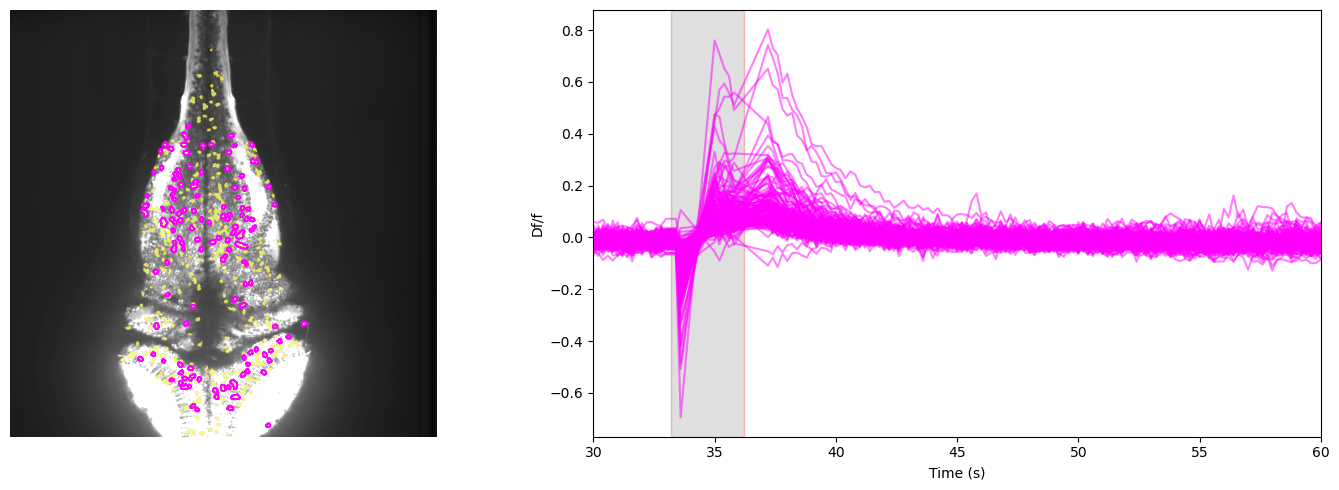

In [33]:
#Make recruitment maps

Active_mask_tot = np.ones((ops['Ly'], ops['Lx']))       #Overall recruitment mask over the 3 trials
Active_Neurons = []                                     #Save the indeces of the recruited neurons in each run

for k in range(0, 3):

    end_stim = end_stims[k]

    Dff = D[k]

    activated_neurons = []
    inhibited_neurons = []

    active_mask_binary = np.zeros((ops['Ly'], ops['Lx']))
    inhibited_mask_binary = np.zeros((ops['Ly'], ops['Lx']))

    for i in range(0, len(Dff)):

        #Compute std 10 seconds before stimulus
        std_trace = np.nanstd(Dff[i, end_stim - 15 - 50:end_stim-15]) 

        #Get coordinates of the current neuron
        ypix = P[i][1] 
        xpix = P[i][0] 

        #Check if DF/F in the 1st sec post stim is above 5 std
        diff = np.nanmean(Dff[i, end_stim:end_stim+5]) - np.nanmean(Dff[i, end_stim-15-5:end_stim-15])
        
        if( np.abs(diff)  >  3 * std_trace ):

            
            activated_neurons.append(i)
            active_mask_binary[ypix,xpix] = 1

    #Update mask and indeces array
    Active_mask_tot = Active_mask_tot*active_mask_binary
    Active_Neurons.append(activated_neurons)


final_act_neu = np.intersect1d(Active_Neurons[0], Active_Neurons[1])
final_act_neu = np.intersect1d(final_act_neu, Active_Neurons[2])
print("Activated: ", final_act_neu)

time = np.linspace(0, 360, 361)
time = time[:-1]*0.2

plt.figure(figsize = (15, 5))

plt.subplot(121)
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)
plt.contour(Active_mask_tot, colors='magenta', linewidths=1)

plt.axis('off')

plt.subplot(122)


idxs = np.arange(0, len(Dff_trial_2))
inactive = np.setdiff1d(idxs, final_act_neu)
inactive


for i in range(0, len(final_act_neu)):
    plt.plot(time, Dff_trial_2[final_act_neu[i], :] - np.mean(Dff_trial_2[final_act_neu[i], :]), alpha = 0.5, color = 'magenta')


#for i in range(0, len(Dff_trial_2)//4):
#    plt.plot(time, Dff_trial_2[inactive[i], :] - np.mean(Dff_trial_2[inactive[i], :]), alpha = 0.5, color = 'yellow')

plt.xlim(30, 60)

plt.xlabel("Time (s)")
plt.ylabel("Df/f")
plt.gca().add_patch(patches.Rectangle((166*0.2, -1), 3., 3, facecolor='gray', edgecolor='red', alpha = 0.25))

plt.tight_layout()

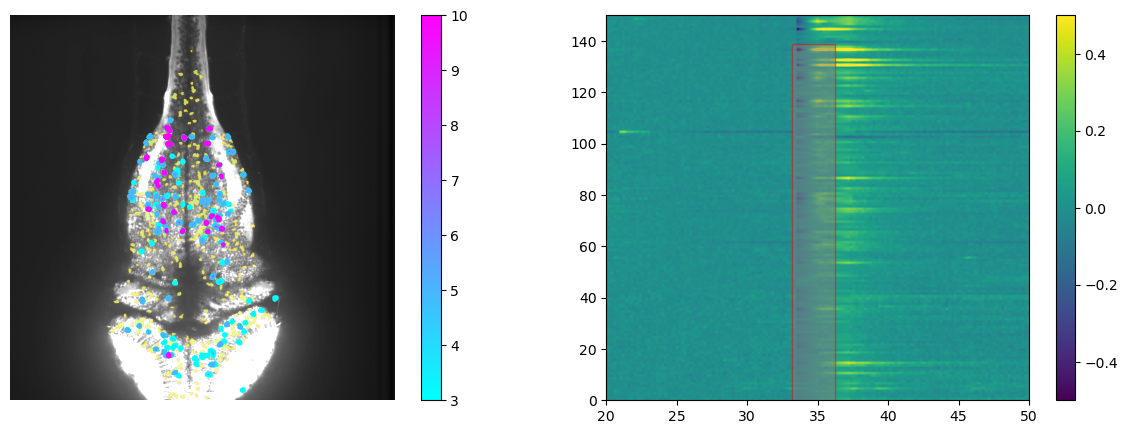

In [36]:
# Plot recruitment maps and activity of recruited neurons
plt.figure(figsize = (15, 5))

Mask = np.zeros((ops['Ly'], ops['Lx']))
S = np.zeros(len(final_act_neu))

for l in range(0, 3):
    Dff = D[l]
    
    for k, i in enumerate(final_act_neu):
    
        ypix = P[i][1] 
        xpix = P[i][0] 

        diff = np.nanmean(Dff[i, end_stim:end_stim+5]) - np.nanmean(Dff[i, end_stim-15-5:end_stim-15])
        std_trace = np.nanstd(Dff[i, end_stim - 15 - 50:end_stim-15]) 

        score = diff/std_trace
        
        Mask[ypix, xpix] = Mask[ypix, xpix] + score/3
        S[k] = S[k] + score/3
        


plt.subplot(121)
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'cool', alpha = (Mask > 0).astype(float), vmin = 3, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'cool', vmin = 3, vmax = 10)

plt.axis('off')

plt.subplot(122)

data = np.zeros(np.shape(Dff_trial_2[final_act_neu, :]))

for i in range(0, len(final_act_neu)):
    data[i] = Dff_trial_2[final_act_neu[i], :] - np.mean(Dff_trial_2[final_act_neu[i], 100:150])
    
plt.imshow(data, aspect = 'auto', extent = [0, np.max(time), 0, len(final_act_neu)], vmax = 0.5, vmin = -0.5)
plt.gca().add_patch(patches.Rectangle((166*0.2, -1), 3., 140, facecolor='gray', edgecolor='red', alpha = 0.5))
plt.xlim(20, 50)
plt.colorbar()

#plt.savefig("a.svg")

98


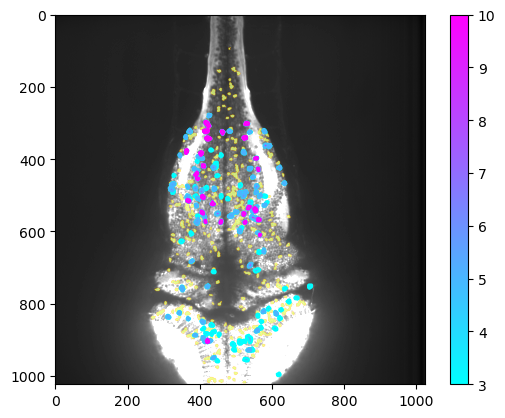

In [39]:
# Compute total number of recruited neurons

plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'cool', alpha = (Mask > 0).astype(float), vmin = 3, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'cool', vmin = 3, vmax = 10)

no = 0

for l in range(0, 1):
    Dff = D[l]
    
    for k, i in enumerate(final_act_neu):
    
        ypix = P[i][1] 
        xpix = P[i][0] 
        if(np.mean(ypix) > 200 and np.mean(ypix) < 650 and np.mean(xpix) > 200 and np.mean(xpix) < 650):
            no+=1
                
print(no)

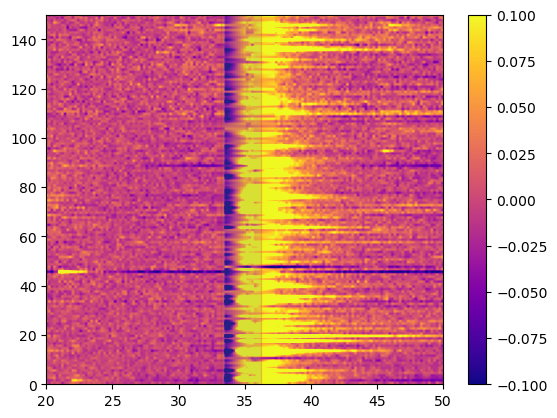

In [41]:
# Raster plot of activity of recruited neurons
data = np.zeros(np.shape(Dff_trial_2[final_act_neu, :]))

for i in range(0, len(final_act_neu)):
    data[i] = Dff_trial_2[final_act_neu[i], :] - np.mean(Dff_trial_2[final_act_neu[i], 100:150])
    
plt.imshow(data[::-1], cmap = 'plasma', aspect = 'auto', extent = [0, np.max(time), 0, len(final_act_neu)], vmax = 0.1, vmin = -0.1)
plt.gca().add_patch(patches.Rectangle((166*0.2, -1), 3., 160, facecolor='gray', edgecolor='red', alpha = 0.2))
plt.xlim(20, 50)
plt.colorbar()
plt.savefig("raster_opsin_a.svg")

(-1.0, 11.0)

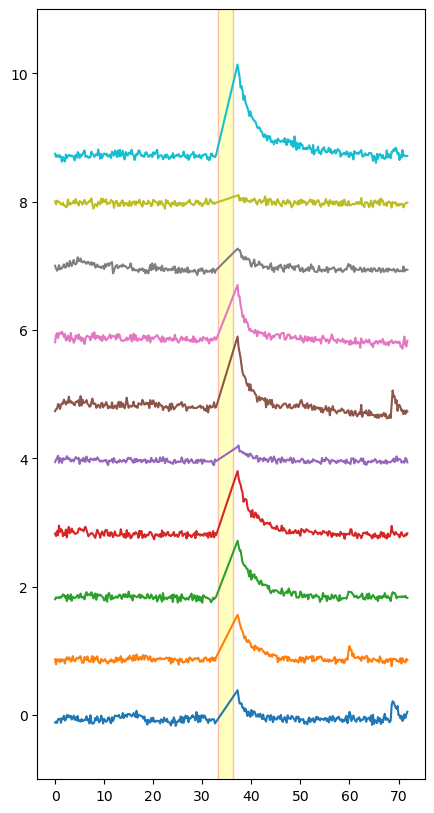

In [174]:
# Single neurons traces during optogenetic activation
plt.figure(figsize = (5, 10))

idxs = [0, 1, 2, 3, 4, 5, 12, 15, 16, 13]

#Dff_trial_1[:, 164] = 'Nan'

for k, i in enumerate(idxs):
    plt.plot(time, (Dff_trial_1[final_act_neu[i], :] - np.nanmean(Dff_trial_1[final_act_neu[i], 100:200]))*3 + k)

plt.gca().add_patch(patches.Rectangle((166*0.2, -2), 3., 60, facecolor='yellow', edgecolor='red', alpha = 0.25))

plt.ylim(-1.0, 11)
#plt.savefig("traces_opsin.svg")
#plt.xlim(0, 250)

(-0.5, 4.0)

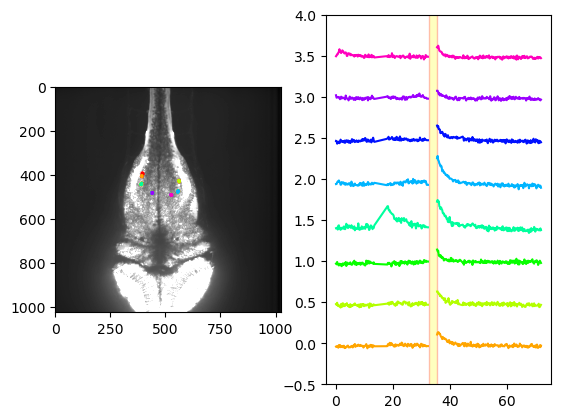

In [51]:
from matplotlib.colors import ListedColormap
Mask = np.zeros((ops['Ly'], ops['Lx']))

idxs = [11, 22, 25, 33, 35, 44, 50, 54]

for k, i in enumerate(idxs):
    ypix = P[final_act_neu[i]][1] 
    xpix = P[final_act_neu[i]][0] 
    Mask[ypix, xpix] = k

colors = plt.cm.hsv(np.linspace(0, 1, 10))
cmap = ListedColormap(colors)

plt.subplot(121)
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
#plt.imshow(Mask, cmap = 'hsv', alpha = (Mask >0).astype(float))
plt.imshow(Mask, cmap = cmap, alpha = (Mask >0).astype(float))
plt.contour(Mask, cmap = cmap)

plt.subplot(122)
Dff_trial_3[:, 162:162+15] = 'Nan'

for k, i in enumerate(idxs):
    plt.plot(time, (Dff_trial_3[final_act_neu[i], :] - np.nanmean(Dff_trial_3[final_act_neu[i], 100:200])) + k/2, color = colors[k+1])

plt.gca().add_patch(patches.Rectangle((162*0.2, -2), 3., 60, facecolor='yellow', edgecolor='red', alpha = 0.25))

plt.ylim(-.5, 4)



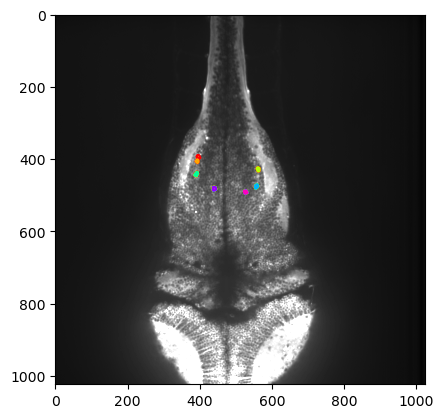

In [53]:
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/2.5)
#plt.imshow(Mask, cmap = 'hsv', alpha = (Mask >0).astype(float))
plt.imshow(Mask, cmap = cmap, alpha = (Mask >0).astype(float))
plt.contour(Mask, cmap = cmap)
plt.savefig("Opsin_neurons.svg")

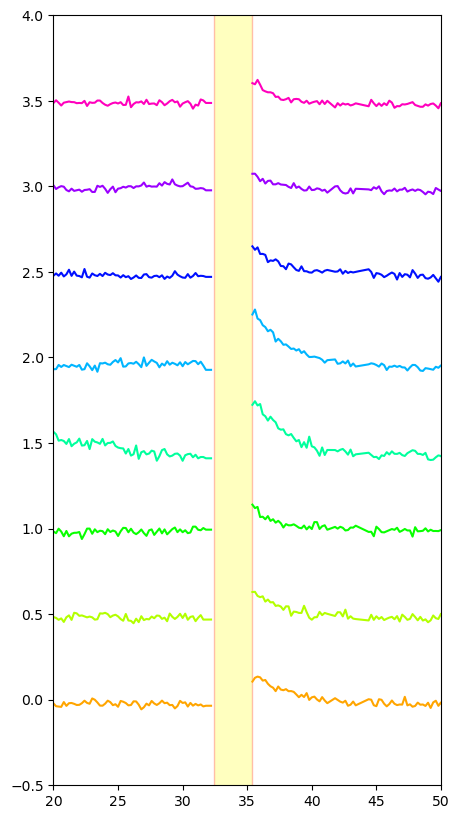

In [59]:
plt.figure(figsize = (5, 10))
for k, i in enumerate(idxs):
    plt.plot(time, (Dff_trial_3[final_act_neu[i], :] - np.nanmean(Dff_trial_3[final_act_neu[i], 100:200])) + k/2, color = colors[k+1])

plt.gca().add_patch(patches.Rectangle((162*0.2, -2), 3., 60, facecolor='yellow', edgecolor='red', alpha = 0.25))

plt.ylim(-.5, 4)
plt.xlim(20, 50)
plt.savefig("Opsin_traces.svg")


(-0.5, 1023.5, 1023.5, -0.5)

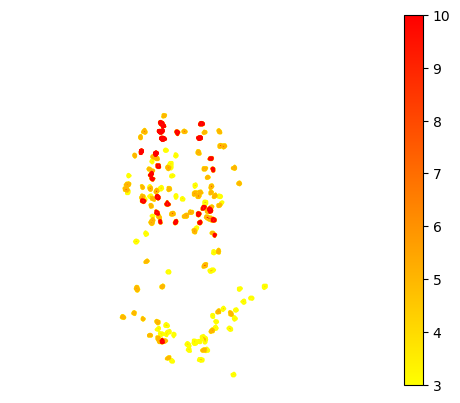

In [31]:
# Mask of recruited neurons
## plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
#plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'autumn_r', alpha = (Mask > 0).astype(float), vmin = 3, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'autumn_r', vmin = 3, vmax = 10)

plt.axis('off')

#plt.savefig("P2_opsin.svg")

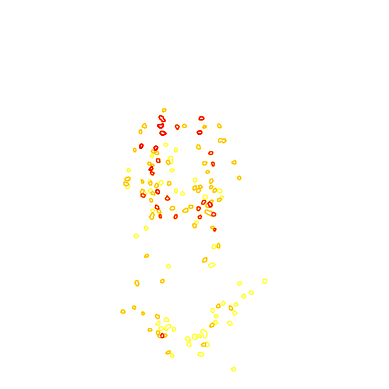

In [103]:
#plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/2)
#plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'autumn_r', alpha = 0, vmin = 3, vmax = 10)
#plt.colorbar()
plt.contour(Mask, cmap = 'autumn_r', vmin = 3, vmax = 10, linewidths = 0.75)

plt.axis('off')

#np.save("p2_out.npy", Mask)

plt.savefig("P2_out_opsin.svg")

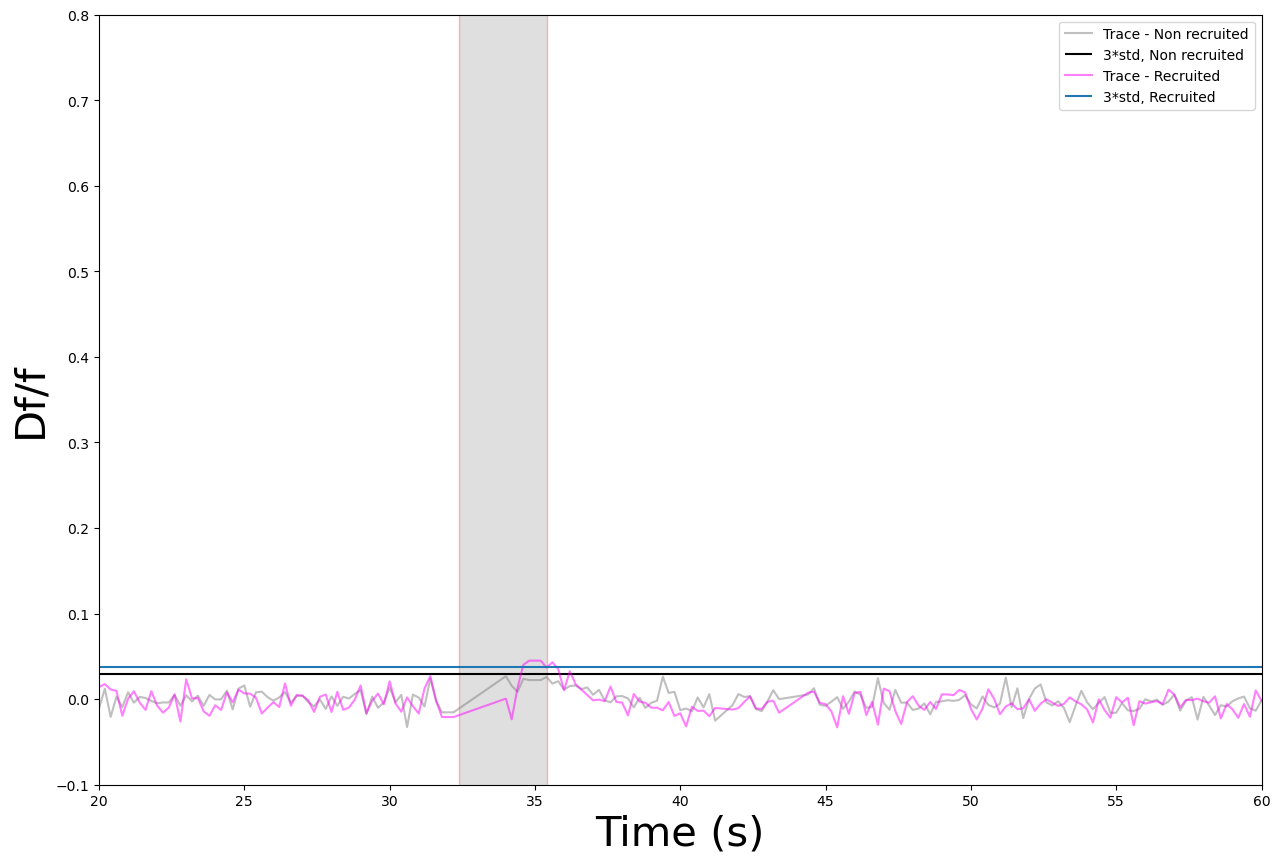

In [33]:
plt.figure(figsize = (15, 10))
i=16
plt.plot(time, Dff_trial_3[i, :] - np.mean(Dff_trial_3[i, 155:160]), alpha = 0.5, color = 'gray', label = 'Trace - Non recruited')
plt.xlim(20, 60)
std_trace = np.nanstd(Dff_trial_3[i, end_stim - 15 - 50:end_stim-15])
plt.hlines(3*std_trace, xmin = 20, xmax =60, label = '3*std, Non recruited', color = 'black')

plt.plot(time, Dff_trial_3[final_act_neu[i], :] - np.mean(Dff_trial_3[final_act_neu[i], 155:160]), alpha = 0.5, color = 'magenta', label = 'Trace - Recruited')
std_trace = np.nanstd(Dff_trial_3[final_act_neu[i], end_stim - 15 - 50:end_stim-15])
plt.hlines(3*std_trace, xmin = 20, xmax =60, label = '3*std, Recruited')

plt.ylim(-0.1, 0.8)
plt.xlabel("Time (s)", fontsize = 30)
plt.ylabel("Df/f", fontsize = 30)
plt.legend()
plt.gca().add_patch(patches.Rectangle((162*0.2, -1), 3., 3, facecolor='gray', edgecolor='red', alpha = 0.25))


## Plane 3

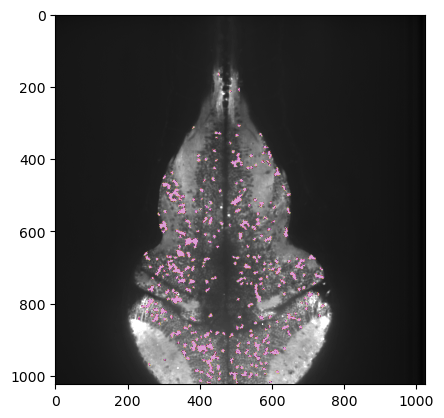

In [41]:
#Load data from suite2p
spks   =   np.load('excitation/F1/rec_opsin/3trials_p3/suite2p/plane0/spks.npy', allow_pickle=True)   
F      =   np.load('excitation/F1/rec_opsin/3trials_p3/suite2p/plane0/F.npy', allow_pickle=True)
F_neu  =   np.load('excitation/F1/rec_opsin/3trials_p3/suite2p/plane0/Fneu.npy', allow_pickle=True)
iscell =   np.load('excitation/F1/rec_opsin/3trials_p3/suite2p/plane0/iscell.npy', allow_pickle=True)
stat   =   np.load('excitation/F1/rec_opsin/3trials_p3/suite2p/plane0/stat.npy', allow_pickle=True)
ops   =   np.load('excitation/F1/rec_opsin/3trials_p3/suite2p/plane0/ops.npy', allow_pickle=True).item()

video = imread('excitation/F1/rec_opsin/3trials_p3/F1_3s_p3_t1_rec copy.tif')

#Get mask of all neurons found
x = []
y = []
    
binCell = (iscell[:,0] == 1)
im = np.zeros((ops['Ly'], ops['Lx']))

for n in range(0,len(spks)):
        
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    x.append(xpix)
    y.append(ypix)
        
    if(binCell[n]):
        
        im[ypix,xpix] = 1

#Plot the mask
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = 80)
plt.imshow(im, alpha = (im>0).astype(float), cmap = 'tab20b')
plt.show()

#Compute df/f  

Fluor_t1 = F[:, 0:360] - 0.7*F_neu[:, 0:360]
Fluor_t2 = F[:, 360:720] - 0.7*F_neu[:, 360:720]

Dff_trial_1 = np.zeros(np.shape(Fluor_t1))
Dff_trial_2 = np.zeros(np.shape(Fluor_t2))

baseline_idxs = (spks == 0)
baseline_1 = baseline_idxs[:, 0:360]
baseline_2 = baseline_idxs[:, 360:720]
baseline_3 = baseline_idxs[:, 720:]

#We take as baseline 20s pre stim and compute df/f

baseline_1[:, 0:50]  = False
baseline_1[:, 150:] = False
   
for k in range(0, len(baseline_1)):
    mean_fluor = np.median(Fluor_t1[:, baseline_1[k,:]]) 
    if(np.isnan(mean_fluor)):
        binCell[k] = False
        
    Dff_trial_1[k,:] = (Fluor_t1[k,:] - mean_fluor)/mean_fluor


baseline_2[:, 0:50]  = False
baseline_2[:, 150:] = False

for k in range(0, len(baseline_2)):
    mean_fluor = np.median(Fluor_t2[:, baseline_2[k,:]])   
    if(np.isnan(mean_fluor)):
        binCell[k] = False
    
    Dff_trial_2[k,:] = (Fluor_t2[k,:] - mean_fluor)/mean_fluor



Dff_trial_1 = Dff_trial_1[binCell, :]
Dff_trial_2 = Dff_trial_2[binCell, :]


#Get the position of the neurons
P = []

for n in range(0,len(spks)):
        
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    x.append(xpix)
    y.append(ypix)
        
    if(binCell[n]):
        P.append([xpix, ypix])

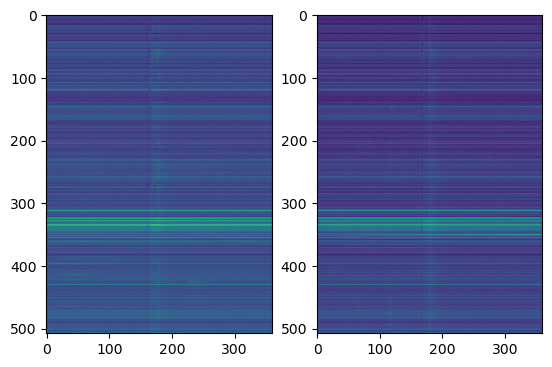

In [42]:
#Interpolate Nan values

Dff_trial_1 = interpolate_nan_values(Dff_trial_1)
Dff_trial_2 = interpolate_nan_values(Dff_trial_2)
Dff_trial_3 = interpolate_nan_values(Dff_trial_3)

plt.subplot(121)
plt.imshow(Dff_trial_1)

plt.subplot(122)
plt.imshow(Dff_trial_2)

plt.show()

#Create dataset with final stim frames
D = [Dff_trial_1, Dff_trial_2]
end_stims = [175, 180]

Activated:  [  2   4  18  20  27  32  33  45  46  49  51  56  57  58  59  60  61  63
  64  66  68  69  71  73  74  77  80  83  90  91  94  95 101 114 120 121
 122 125 129 131 140 145 146 147 152 160 162 163 164 167 168 180 183 191
 192 199 203 206 211 222 231 232 233 234 239 241 242 243 246 253 256 258
 260 268 271 276 277 279 281 290 296 300 304 306 307 315 317 321 328 330
 331 333 335 339 340 341 342 343 344 346 347 349 355 357 359 362 366 374
 379 384 385 389 391 392 396 397 403 406 410 413 414 416 417 418 420 422
 425 427 429 430 431 433 445 457 458 461 464 467 472 473 477 478 479 482
 483 484 499 501 504 507]


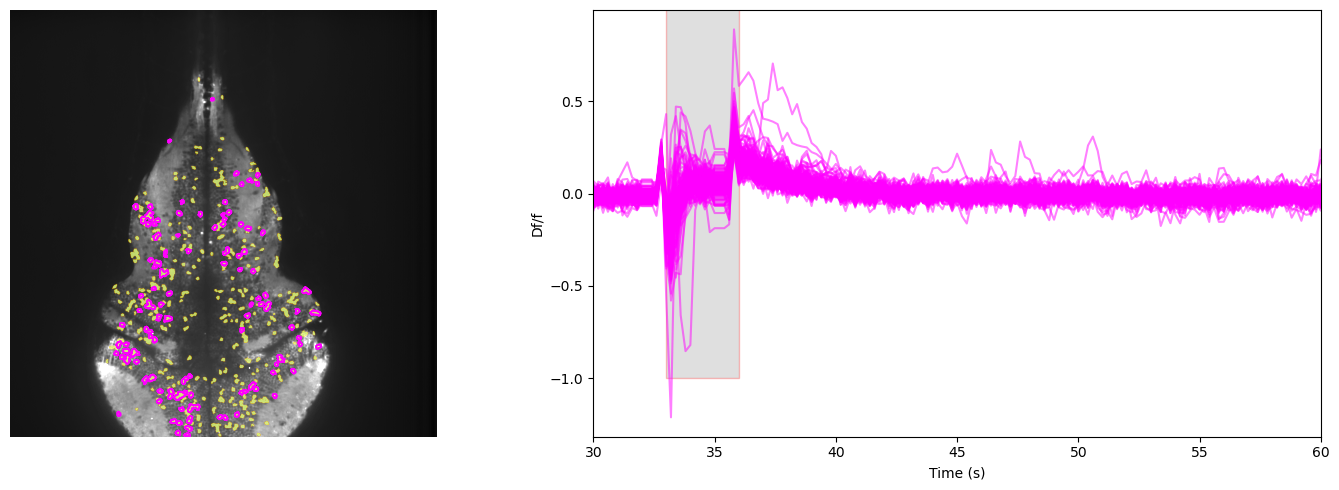

In [45]:
#Make recruitment maps

Active_mask_tot = np.ones((ops['Ly'], ops['Lx']))       #Overall recruitment mask over the 3 trials
Active_Neurons = []                                     #Save the indeces of the recruited neurons in each run
Inhibited_mask_tot = np.ones((ops['Ly'], ops['Lx']))
Inhibited_Neurons = []

for k in range(0, 2):

    end_stim = end_stims[k]

    Dff = D[k]

    activated_neurons = []
    inhibited_neurons = []

    active_mask_binary = np.zeros((ops['Ly'], ops['Lx']))
    inhibited_mask_binary = np.zeros((ops['Ly'], ops['Lx']))

    for i in range(0, len(Dff)):

        #Compute std 20 seconds before stimulus
        std_trace = np.nanstd(Dff[i, end_stim - 15 - 50:end_stim-15]) 

        #Get coordinates of the current neuron
        ypix = P[i][1] 
        xpix = P[i][0] 

        #Check if DF/F in the 1st sec post stim is above 5 std
        diff = np.nanmean(Dff[i, end_stim:end_stim+5]) - np.nanmean(Dff[i, end_stim-15-25:end_stim-25])
        
        if( np.abs(diff)  >  3 * std_trace ):

            activated_neurons.append(i)
            active_mask_binary[ypix,xpix] = 1
        
        
        diff = np.nanstd(Dff[i, end_stim:end_stim+50]) - np.nanstd(Dff[i, end_stim-15-50:end_stim-15])
        

    #Update mask and indeces array
    Active_mask_tot = Active_mask_tot*active_mask_binary
    Active_Neurons.append(activated_neurons)

    Inhibited_mask_tot = Inhibited_mask_tot*inhibited_mask_binary
    Inhibited_Neurons.append(inhibited_neurons)
    
final_act_neu = np.intersect1d(Active_Neurons[0], Active_Neurons[1])
print("Activated: ", final_act_neu)


time = np.linspace(0, 360, 361)
time = time[:-1]*0.2

plt.figure(figsize = (15, 5))

plt.subplot(121)
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)
plt.contour(Active_mask_tot, colors='magenta', linewidths=1)

plt.axis('off')

plt.subplot(122)

for i in range(0, len(final_act_neu)):
    plt.plot(time, Dff_trial_2[final_act_neu[i], :] - np.mean(Dff_trial_2[final_act_neu[i], :]), alpha = 0.5, color = 'magenta')


plt.xlim(30, 60)
#for i in range(0, len(final_inh_neu)):
#    plt.plot(time, Dff_trial_1[final_inh_neu[i], :] - np.mean(Dff_trial_1[final_inh_neu[i], :]), color = 'cyan', alpha = 0.5)
plt.xlabel("Time (s)")
plt.ylabel("Df/f")
plt.gca().add_patch(patches.Rectangle((165*0.2, -1), 3., 3, facecolor='gray', edgecolor='red', alpha = 0.25))

plt.tight_layout()

In [47]:
len(final_act_neu)

150

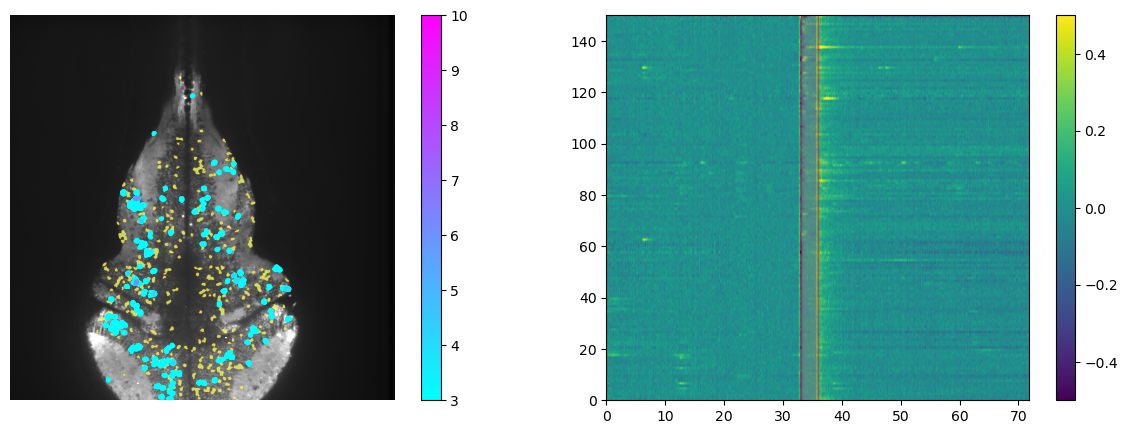

In [49]:

plt.figure(figsize = (15, 5))

Mask = np.zeros((ops['Ly'], ops['Lx']))
S = np.zeros(len(final_act_neu))

for l in range(0, 2):
    Dff = D[l]
    
    for k, i in enumerate(final_act_neu):
    
        ypix = P[i][1] 
        xpix = P[i][0] 

        diff = np.nanmean(Dff[i, end_stim:end_stim+5]) - np.nanmean(Dff[i, end_stim-15-5:end_stim-15])
        std_trace = np.nanstd(Dff[i, end_stim - 15 - 50:end_stim-15]) 

        score = diff/std_trace
        
        Mask[ypix, xpix] = Mask[ypix, xpix] + score/3
        S[k] = S[k] + score/3
        


plt.subplot(121)
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'cool', alpha = (Mask > 0).astype(float), vmin = 3, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'cool', vmin = 3, vmax = 10)

plt.axis('off')

plt.subplot(122)

data = np.zeros(np.shape(Dff_trial_2[final_act_neu, :]))

for i in range(0, len(final_act_neu)):
    data[i] = Dff_trial_2[final_act_neu[i], :] - np.mean(Dff_trial_2[final_act_neu[i], 100:150])
    
plt.imshow(data, aspect = 'auto', extent = [0, np.max(time), 0, len(final_act_neu)], vmax = 0.5, vmin = -0.5)
plt.gca().add_patch(patches.Rectangle((165*0.2, -1), 3., 160, facecolor='gray', edgecolor='red', alpha = 0.5))
plt.colorbar()

51


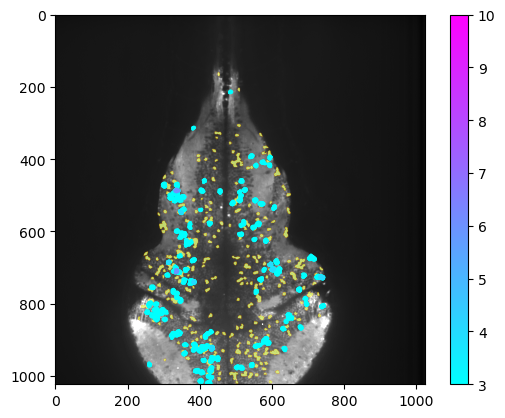

In [51]:
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'cool', alpha = (Mask > 0).astype(float), vmin = 3, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'cool', vmin = 3, vmax = 10)

no = 0

for l in range(0, 1):
    Dff = D[l]
    
    for k, i in enumerate(final_act_neu):
    
        ypix = P[i][1] 
        xpix = P[i][0] 
        if(np.mean(ypix) > 200 and np.mean(ypix) < 650 and np.mean(xpix) > 200 and np.mean(xpix) < 650):
            no+=1
                
print(no)

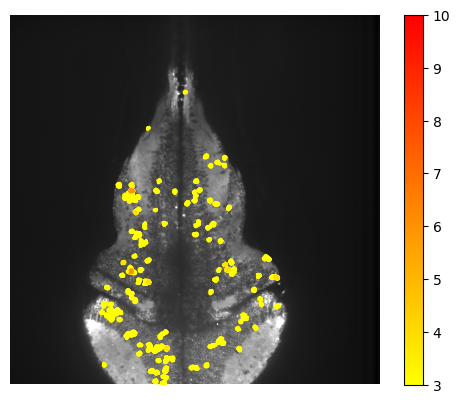

In [115]:
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
#plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'autumn_r', alpha = (Mask > 0).astype(float), vmin = 3, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'autumn_r', vmin = 3, vmax = 10)

plt.axis('off')

plt.savefig("P3_opsin.svg")

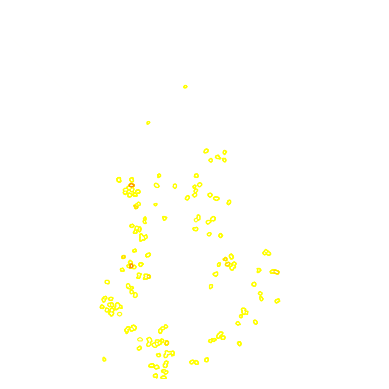

In [117]:
#plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/2)
#plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'autumn_r', alpha = 0, vmin = 3, vmax = 10)
#plt.colorbar()
plt.contour(Mask, cmap = 'autumn_r', vmin = 3, vmax = 10, linewidths = 0.75)

plt.axis('off')

#np.save("p3_out.npy", Mask)

plt.savefig("P3_out_opsin.svg")

## Plane 4

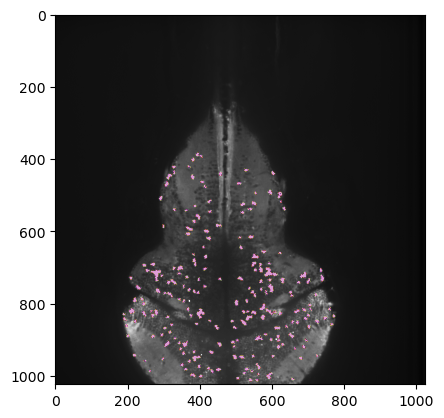

In [53]:
#Load data from suite2p
spks   =   np.load('excitation/F1/rec_opsin/3trials_p4/suite2p/plane0/spks.npy', allow_pickle=True)   
F      =   np.load('excitation/F1/rec_opsin/3trials_p4/suite2p/plane0/F.npy', allow_pickle=True)
F_neu  =   np.load('excitation/F1/rec_opsin/3trials_p4/suite2p/plane0/Fneu.npy', allow_pickle=True)
iscell =   np.load('excitation/F1/rec_opsin/3trials_p4/suite2p/plane0/iscell.npy', allow_pickle=True)
stat   =   np.load('excitation/F1/rec_opsin/3trials_p4/suite2p/plane0/stat.npy', allow_pickle=True)
ops   =   np.load('excitation/F1/rec_opsin/3trials_p4/suite2p/plane0/ops.npy', allow_pickle=True).item()

video = imread('excitation/F1/rec_opsin/3trials_p4/F1_3s_p4_t1_rec copy.tif')

#Get mask of all neurons found
x = []
y = []
    
binCell = (iscell[:,0] == 1)
im = np.zeros((ops['Ly'], ops['Lx']))

for n in range(0,len(spks)):
        
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    x.append(xpix)
    y.append(ypix)
        
    if(binCell[n]):
        
        im[ypix,xpix] = 1

#Plot the mask
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = 80)
plt.imshow(im, alpha = (im>0).astype(float), cmap = 'tab20b')
plt.show()

#Compute df/f  

Fluor_t1 = F[:, 0:360] - 0.7*F_neu[:, 0:360]
Fluor_t2 = F[:, 360:720] - 0.7*F_neu[:, 360:720]
Fluor_t3 = F[:, 720:] - 0.7*F_neu[:, 720:]

    
Dff_trial_1 = np.zeros(np.shape(Fluor_t1))
Dff_trial_2 = np.zeros(np.shape(Fluor_t2))
Dff_trial_3 = np.zeros(np.shape(Fluor_t3))

baseline_idxs = (spks == 0)
baseline_1 = baseline_idxs[:, 0:360]
baseline_2 = baseline_idxs[:, 360:720]
baseline_3 = baseline_idxs[:, 720:]

#We take as baseline 20s pre stim and compute df/f

baseline_1[:, 0:50]  = False
baseline_1[:, 150:] = False
   
for k in range(0, len(baseline_1)):
    mean_fluor = np.median(Fluor_t1[:, baseline_1[k,:]]) 
    if(np.isnan(mean_fluor)):
        binCell[k] = False
        
    Dff_trial_1[k,:] = (Fluor_t1[k,:] - mean_fluor)/mean_fluor

baseline_2[:, 0:50]  = False
baseline_2[:, 150:] = False

for k in range(0, len(baseline_2)):
    mean_fluor = np.median(Fluor_t2[:, baseline_2[k,:]])   
    if(np.isnan(mean_fluor)):
        binCell[k] = False
    
    Dff_trial_2[k,:] = (Fluor_t2[k,:] - mean_fluor)/mean_fluor

Dff_trial_2[:, 170:173] = 'Nan'

baseline_3[:, 0:50]  = False
baseline_3[:, 150:] = False

for k in range(0, len(baseline_3)):
    
    mean_fluor = np.median(Fluor_t3[:, baseline_3[k,:]])   
    
    if(np.isnan(mean_fluor)):
        binCell[k] = False

    Dff_trial_3[k,:] = (Fluor_t3[k,:] - mean_fluor)/mean_fluor

Dff_trial_3[:, 167:169] = 'Nan'

Dff_trial_1 = Dff_trial_1[binCell, :]
Dff_trial_2 = Dff_trial_2[binCell, :]
Dff_trial_3 = Dff_trial_3[binCell, :]


#Get the position of the neurons
P = []

for n in range(0,len(spks)):
        
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    x.append(xpix)
    y.append(ypix)
        
    if(binCell[n]):
        P.append([xpix, ypix])

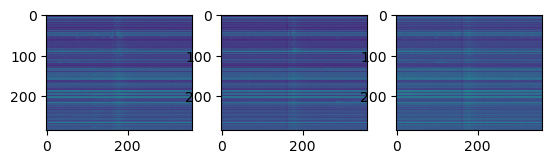

In [54]:
#Interpolate Nan values

Dff_trial_1 = interpolate_nan_values(Dff_trial_1)
Dff_trial_2 = interpolate_nan_values(Dff_trial_2)
Dff_trial_3 = interpolate_nan_values(Dff_trial_3)

plt.subplot(131)
plt.imshow(Dff_trial_1)

plt.subplot(132)
plt.imshow(Dff_trial_2)

plt.subplot(133)
plt.imshow(Dff_trial_3)

plt.show()

#Create dataset with final stim frames
D = [Dff_trial_1, Dff_trial_2, Dff_trial_3]
end_stims = [176, 176, 177]

In [55]:
#Make recruitment maps

Active_mask_tot = np.ones((ops['Ly'], ops['Lx']))       #Overall recruitment mask over the 3 trials
Active_Neurons = []                                     #Save the indeces of the recruited neurons in each run

for k in range(0, 3):

    end_stim = end_stims[k]

    Dff = D[k]

    activated_neurons = []
    inhibited_neurons = []

    active_mask_binary = np.zeros((ops['Ly'], ops['Lx']))
    inhibited_mask_binary = np.zeros((ops['Ly'], ops['Lx']))

    for i in range(0, len(Dff)):

        #Compute std 20 seconds before stimulus
        std_trace = np.nanstd(Dff[i, end_stim - 15 - 50:end_stim-15]) 

        #Get coordinates of the current neuron
        ypix = P[i][1] 
        xpix = P[i][0] 

        #Check if DF/F in the 1st sec post stim is above 5 std
        diff = np.nanmean(Dff[i, end_stim:end_stim+5]) - np.nanmean(Dff[i, end_stim-15-25:end_stim-25])
        
        if( np.abs(diff)  >  3 * std_trace ):

            activated_neurons.append(i)
            active_mask_binary[ypix,xpix] = 1
        
        


    #Update mask and indeces array
    Active_mask_tot = Active_mask_tot*active_mask_binary
    Active_Neurons.append(activated_neurons)

    Inhibited_mask_tot = Inhibited_mask_tot*inhibited_mask_binary
    Inhibited_Neurons.append(inhibited_neurons)


In [58]:
len(final_act_neu)

94

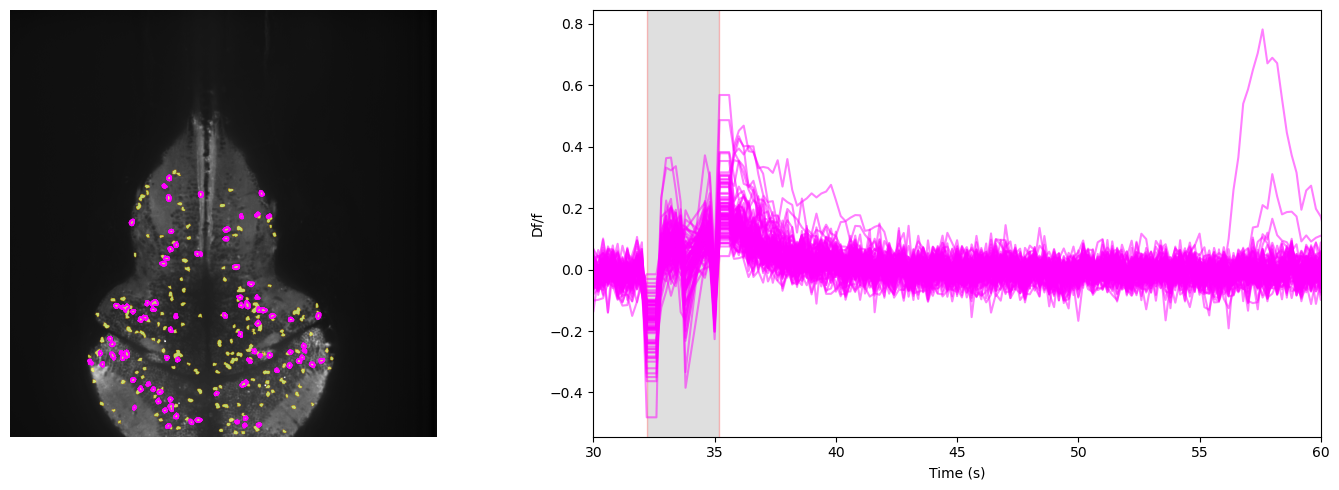

In [59]:
time = np.linspace(0, 360, 361)
time = time[:-1]*0.2

plt.figure(figsize = (15, 5))

plt.subplot(121)
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)
plt.contour(Active_mask_tot, colors='magenta', linewidths=1)
plt.contour(Inhibited_mask_tot, colors='cyan', linewidths=1)

plt.axis('off')

plt.subplot(122)

for i in range(0, len(final_act_neu)):
    plt.plot(time, Dff_trial_2[final_act_neu[i], :] - np.mean(Dff_trial_2[final_act_neu[i], :]), alpha = 0.5, color = 'magenta')

for i in range(0, len(final_inh_neu)):
    plt.plot(time, Dff_trial_2[final_inh_neu[i], :] - np.mean(Dff_trial_2[final_inh_neu[i], :]), alpha = 0.5, color = 'cyan')

plt.xlim(30, 60)
#for i in range(0, len(final_inh_neu)):
#    plt.plot(time, Dff_trial_1[final_inh_neu[i], :] - np.mean(Dff_trial_1[final_inh_neu[i], :]), color = 'cyan', alpha = 0.5)
plt.xlabel("Time (s)")
plt.ylabel("Df/f")
plt.gca().add_patch(patches.Rectangle((161*0.2, -1), 3., 3, facecolor='gray', edgecolor='red', alpha = 0.25))

plt.tight_layout()

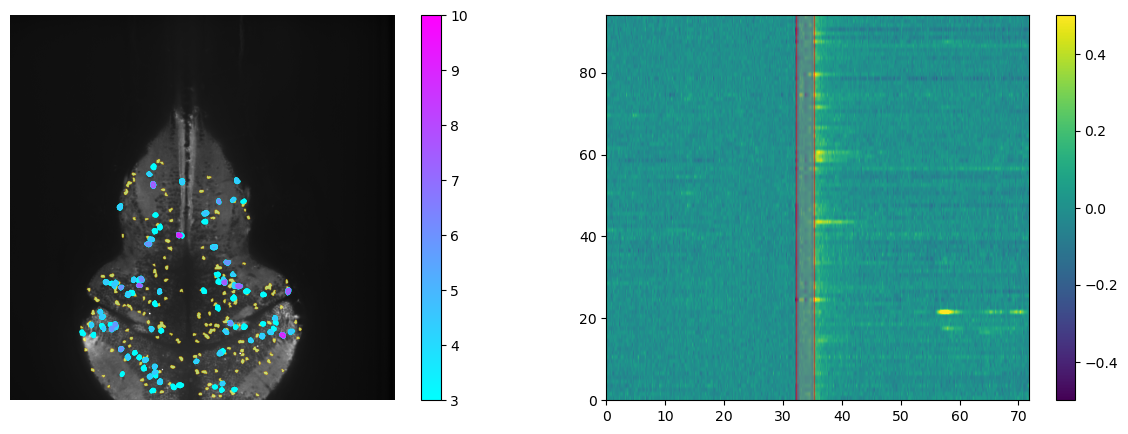

In [64]:
plt.figure(figsize = (15, 5))

Mask = np.zeros((ops['Ly'], ops['Lx']))
S = np.zeros(len(final_act_neu))

for l in range(0, 3):
    Dff = D[l]
    
    for k, i in enumerate(final_act_neu):
    
        ypix = P[i][1] 
        xpix = P[i][0] 

        diff = np.nanmean(Dff[i, end_stim:end_stim+5]) - np.nanmean(Dff[i, end_stim-15-5:end_stim-15])
        std_trace = np.nanstd(Dff[i, end_stim - 15 - 50:end_stim-15]) 

        score = diff/std_trace
        
        Mask[ypix, xpix] = Mask[ypix, xpix] + score/3
        S[k] = S[k] + score/3
        


plt.subplot(121)
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'cool', alpha = (Mask > 0).astype(float), vmin = 3, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'cool', vmin = 3, vmax = 10)

plt.axis('off')

plt.subplot(122)

data = np.zeros(np.shape(Dff_trial_2[final_act_neu, :]))

for i in range(0, len(final_act_neu)):
    data[i] = Dff_trial_2[final_act_neu[i], :] - np.mean(Dff_trial_2[final_act_neu[i], 100:150])
    
plt.imshow(data, aspect = 'auto', extent = [0, np.max(time), 0, len(final_act_neu)], vmax = 0.5, vmin = -0.5)
plt.gca().add_patch(patches.Rectangle((161*0.2, -1), 3., 140, facecolor='gray', edgecolor='red', alpha = 0.5))
plt.colorbar()

43


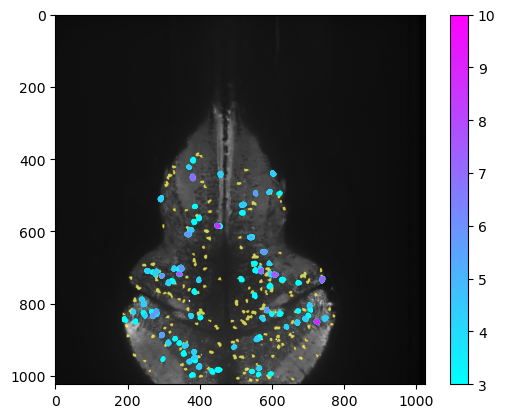

In [69]:
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'cool', alpha = (Mask > 0).astype(float), vmin = 3, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'cool', vmin = 3, vmax = 10)

no = 0

for l in range(0, 1):
    Dff = D[l]
    
    for k, i in enumerate(final_act_neu):
    
        ypix = P[i][1] 
        xpix = P[i][0] 
        if(np.mean(ypix) > 200 and np.mean(ypix) < 750 and np.mean(xpix) > 200 and np.mean(xpix) < 750):
            no+=1
                
print(no)

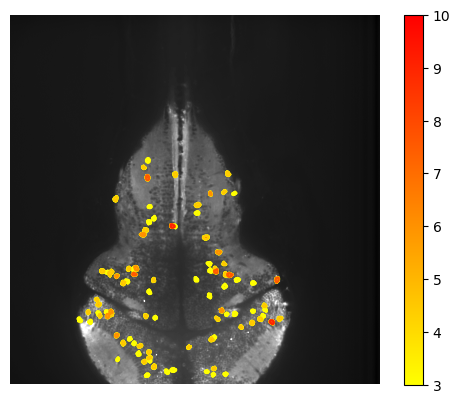

In [133]:
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/4)
#plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'autumn_r', alpha = (Mask > 0).astype(float), vmin = 3, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'autumn_r', vmin = 3, vmax = 10)

plt.axis('off')

plt.savefig("P4_opsin.svg")

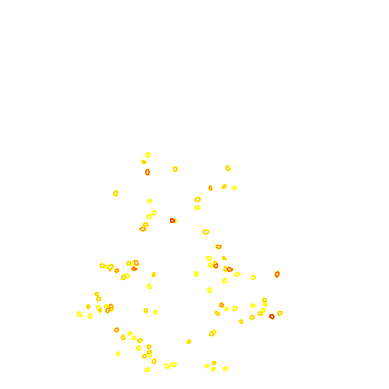

In [135]:
#plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/2)
#plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'autumn_r', alpha = 0, vmin = 3, vmax = 10)
#plt.colorbar()
plt.contour(Mask, cmap = 'autumn_r', vmin = 3, vmax = 10, linewidths = 0.75)

plt.axis('off')

#np.save("p4_out.npy", Mask)

plt.savefig("P4_out_opsin.svg")

## Plane 5

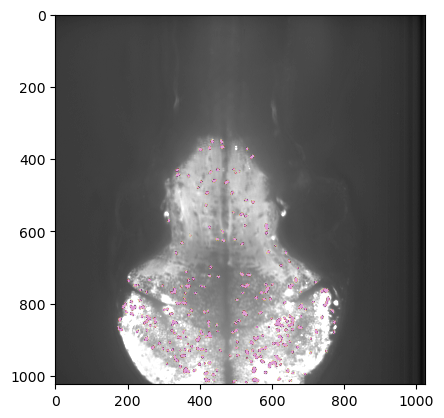

In [71]:
#Load data from suite2p
spks   =   np.load('excitation/F1/rec_opsin/3trials_p5/suite2p/plane0/spks.npy', allow_pickle=True)   
F      =   np.load('excitation/F1/rec_opsin/3trials_p5/suite2p/plane0/F.npy', allow_pickle=True)
F_neu  =   np.load('excitation/F1/rec_opsin/3trials_p5/suite2p/plane0/Fneu.npy', allow_pickle=True)
iscell =   np.load('excitation/F1/rec_opsin/3trials_p5/suite2p/plane0/iscell.npy', allow_pickle=True)
stat   =   np.load('excitation/F1/rec_opsin/3trials_p5/suite2p/plane0/stat.npy', allow_pickle=True)
ops   =   np.load('excitation/F1/rec_opsin/3trials_p5/suite2p/plane0/ops.npy', allow_pickle=True).item()

video = imread('excitation/F1/rec_opsin/3trials_p5/F1_3s_p5_t1_rec copy.tif')

#Get mask of all neurons found
x = []
y = []
    
binCell = (iscell[:,0] == 1)
im = np.zeros((ops['Ly'], ops['Lx']))

for n in range(0,len(spks)):
        
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    x.append(xpix)
    y.append(ypix)
        
    if(binCell[n]):
        
        im[ypix,xpix] = 1

#Plot the mask
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = 80)
plt.imshow(im, alpha = (im>0).astype(float), cmap = 'tab20b')
plt.show()

#Compute df/f  

Fluor_t1 = F[:, 0:360] - 0.7*F_neu[:, 0:360]
Fluor_t2 = F[:, 360:720] - 0.7*F_neu[:, 360:720]

Dff_trial_1 = np.zeros(np.shape(Fluor_t1))
Dff_trial_2 = np.zeros(np.shape(Fluor_t2))

baseline_idxs = (spks == 0)
baseline_1 = baseline_idxs[:, 0:360]
baseline_2 = baseline_idxs[:, 360:720]

#We take as baseline 20s pre stim and compute df/f

baseline_1[:, 0:50]  = False
baseline_1[:, 150:] = False
   
for k in range(0, len(baseline_1)):
    mean_fluor = np.median(Fluor_t1[:, baseline_1[k,:]]) 
    if(np.isnan(mean_fluor)):
        binCell[k] = False
        
    Dff_trial_1[k,:] = (Fluor_t1[k,:] - mean_fluor)/mean_fluor

Dff_trial_1[:, 161:176] = 'Nan'

baseline_2[:, 0:50]  = False
baseline_2[:, 150:] = False

for k in range(0, len(baseline_2)):
    mean_fluor = np.median(Fluor_t2[:, baseline_2[k,:]])   
    if(np.isnan(mean_fluor)):
        binCell[k] = False
    
    Dff_trial_2[k,:] = (Fluor_t2[k,:] - mean_fluor)/mean_fluor

Dff_trial_2[:, 165:170] = 'Nan'


Dff_trial_1 = Dff_trial_1[binCell, :]
Dff_trial_2 = Dff_trial_2[binCell, :]


#Get the position of the neurons
P = []

for n in range(0,len(spks)):
        
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    x.append(xpix)
    y.append(ypix)
        
    if(binCell[n]):
        P.append([xpix, ypix])

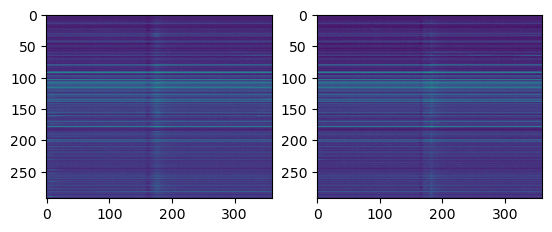

In [72]:
#Interpolate Nan values

Dff_trial_1 = interpolate_nan_values(Dff_trial_1)
Dff_trial_2 = interpolate_nan_values(Dff_trial_2)

plt.subplot(121)
plt.imshow(Dff_trial_1)

plt.subplot(122)
plt.imshow(Dff_trial_2)

plt.show()

#Create dataset with final stim frames
D = [Dff_trial_1, Dff_trial_2]
end_stims = [175, 179]

In [74]:
#Make recruitment maps

Active_mask_tot = np.ones((ops['Ly'], ops['Lx']))       #Overall recruitment mask over the 3 trials
Active_Neurons = []                                     #Save the indeces of the recruited neurons in each run
Inhibited_mask_tot = np.ones((ops['Ly'], ops['Lx']))
Inhibited_Neurons = []

for k in range(0, 2):

    end_stim = end_stims[k]

    Dff = D[k]

    activated_neurons = []
    inhibited_neurons = []

    active_mask_binary = np.zeros((ops['Ly'], ops['Lx']))
    inhibited_mask_binary = np.zeros((ops['Ly'], ops['Lx']))

    for i in range(0, len(Dff)):

        #Compute std 20 seconds before stimulus
        std_trace = np.nanstd(Dff[i, end_stim - 15 - 50:end_stim-15]) 

        #Get coordinates of the current neuron
        ypix = P[i][1] 
        xpix = P[i][0] 

        #Check if DF/F in the 1st sec post stim is above 5 std
        diff = np.nanmean(Dff[i, end_stim:end_stim+5]) - np.nanmean(Dff[i, end_stim-15-25:end_stim-25])
        
        if( np.abs(diff)  >  3 * std_trace ):

            if(diff > 0):
                activated_neurons.append(i)
                active_mask_binary[ypix,xpix] = 1
        
        
        diff = np.nanstd(Dff[i, end_stim:end_stim+50]) - np.nanstd(Dff[i, end_stim-15-50:end_stim-15])
        
        if( diff  <  -std_trace ):
        #if(np.nanmean(Dff[i, end_stim:end_stim+5]) < 0):
            inhibited_neurons.append(i)
            inhibited_mask_binary[ypix,xpix] = 1
            

    #Update mask and indeces array
    Active_mask_tot = Active_mask_tot*active_mask_binary
    Active_Neurons.append(activated_neurons)

    Inhibited_mask_tot = Inhibited_mask_tot*inhibited_mask_binary
    Inhibited_Neurons.append(inhibited_neurons)


In [79]:
len(final_act_neu)

186

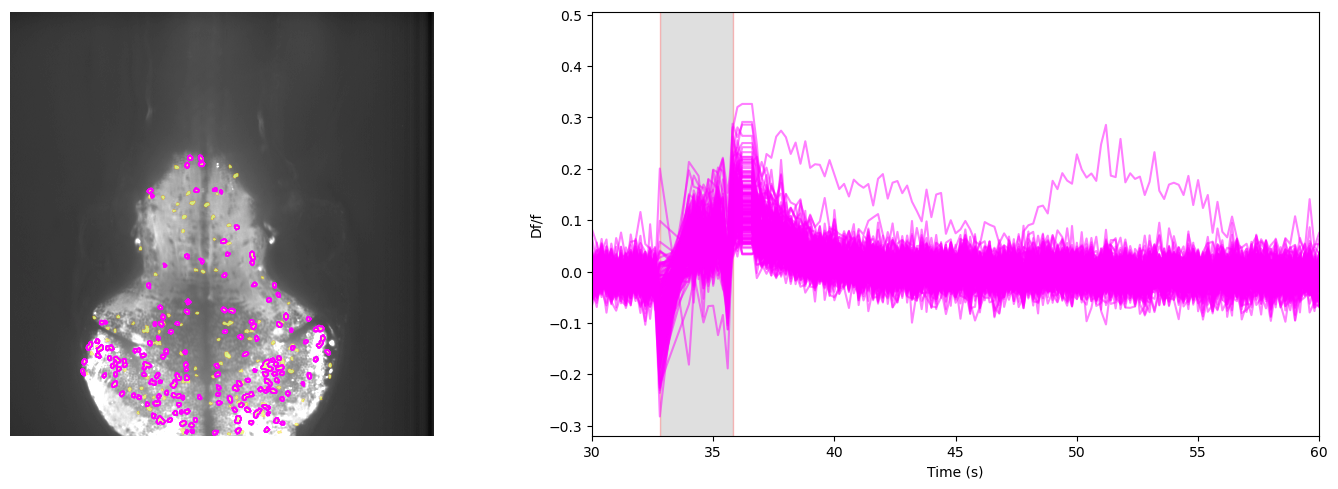

In [80]:
time = np.linspace(0, 360, 361)
time = time[:-1]*0.2

plt.figure(figsize = (15, 5))

plt.subplot(121)
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)
plt.contour(Active_mask_tot, colors='magenta', linewidths=1)
plt.contour(Inhibited_mask_tot, colors='cyan', linewidths=1)

plt.axis('off')

plt.subplot(122)

for i in range(0, len(final_act_neu)):
    plt.plot(time, Dff_trial_2[final_act_neu[i], :] - np.mean(Dff_trial_2[final_act_neu[i], :]), alpha = 0.5, color = 'magenta')

for i in range(0, len(final_inh_neu)):
    plt.plot(time, Dff_trial_2[final_inh_neu[i], :] - np.mean(Dff_trial_2[final_inh_neu[i], :]), alpha = 0.5, color = 'cyan')

plt.xlim(30, 60)
#for i in range(0, len(final_inh_neu)):
#    plt.plot(time, Dff_trial_1[final_inh_neu[i], :] - np.mean(Dff_trial_1[final_inh_neu[i], :]), color = 'cyan', alpha = 0.5)
plt.xlabel("Time (s)")
plt.ylabel("Df/f")
plt.gca().add_patch(patches.Rectangle((164*0.2, -1), 3., 3, facecolor='gray', edgecolor='red', alpha = 0.25))

plt.tight_layout()

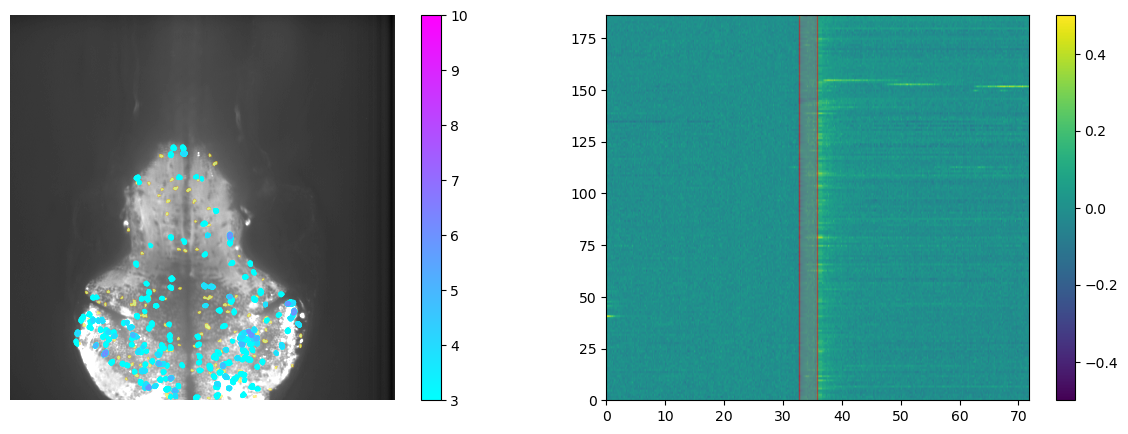

In [81]:
plt.figure(figsize = (15, 5))

Mask = np.zeros((ops['Ly'], ops['Lx']))
S = np.zeros(len(final_act_neu))

for l in range(0, 2):
    Dff = D[l]
    
    for k, i in enumerate(final_act_neu):
    
        ypix = P[i][1] 
        xpix = P[i][0] 

        diff = np.nanmean(Dff[i, end_stim:end_stim+5]) - np.nanmean(Dff[i, end_stim-15-5:end_stim-15])
        std_trace = np.nanstd(Dff[i, end_stim - 15 - 50:end_stim-15]) 

        score = diff/std_trace
        
        Mask[ypix, xpix] = Mask[ypix, xpix] + score/3
        S[k] = S[k] + score/3
        


plt.subplot(121)
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'cool', alpha = (Mask > 0).astype(float), vmin = 3, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'cool', vmin = 3, vmax = 10)

plt.axis('off')

plt.subplot(122)

data = np.zeros(np.shape(Dff_trial_2[final_act_neu, :]))

for i in range(0, len(final_act_neu)):
    data[i] = Dff_trial_2[final_act_neu[i], :] - np.mean(Dff_trial_2[final_act_neu[i], 100:150])
    
plt.imshow(data, aspect = 'auto', extent = [0, np.max(time), 0, len(final_act_neu)], vmax = 0.5, vmin = -0.5)
plt.gca().add_patch(patches.Rectangle((164*0.2, -1), 3., 200, facecolor='gray', edgecolor='red', alpha = 0.5))
plt.colorbar()

54


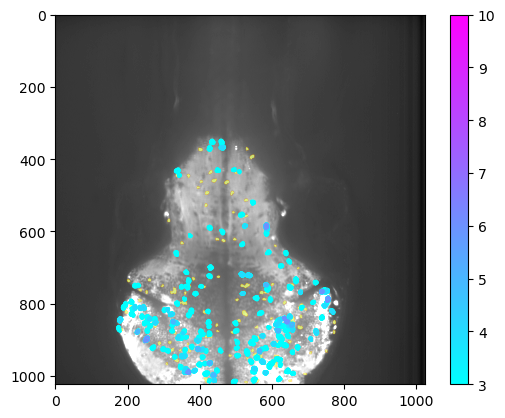

In [89]:
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'cool', alpha = (Mask > 0).astype(float), vmin = 3, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'cool', vmin = 3, vmax = 10)

no = 0

for l in range(0, 1):
    Dff = D[l]
    
    for k, i in enumerate(final_act_neu):
    
        ypix = P[i][1] 
        xpix = P[i][0] 
        if(np.mean(ypix) > 200 and np.mean(ypix) < 800 and np.mean(xpix) > 200 and np.mean(xpix) < 800):
            no+=1
                
print(no)

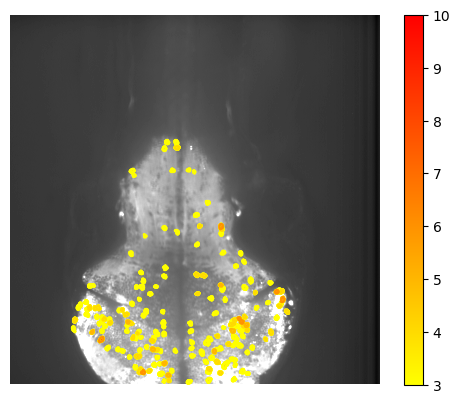

In [152]:
plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/3)
#plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'autumn_r', alpha = (Mask > 0).astype(float), vmin = 3, vmax = 10)
plt.colorbar()
plt.contour(Mask, cmap = 'autumn_r', vmin = 3, vmax = 10)

plt.axis('off')
#np.save("p5_out.npy", Mask)

plt.savefig("P5_opsin.svg")

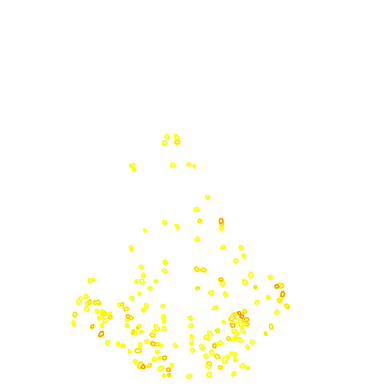

In [154]:
#plt.imshow(np.mean(video, axis =0), cmap = 'gray', alpha = 1, vmax = np.max(video)/2)
#plt.imshow(im, cmap = 'Wistia_r', alpha = (im > 0).astype(float)*0.8)

plt.imshow(Mask, cmap = 'autumn_r', alpha = 0, vmin = 3, vmax = 10)
#plt.colorbar()
plt.contour(Mask, cmap = 'autumn_r', vmin = 3, vmax = 10, linewidths = 0.75)

plt.axis('off')

plt.savefig("P5_out_opsin.svg")